In [1]:
pip install pandas networkx matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import urllib.request
import pandas as pd  # Import pandas to fix the NameError

# Download the file if it doesn't exist
file_url = "https://snap.stanford.edu/data/facebook_combined.txt.gz"
file_name = "facebook_combined.txt.gz"
urllib.request.urlretrieve(file_url, file_name)

# Extract the file
import gzip
import shutil
with gzip.open(file_name, 'rb') as f_in:
    with open("facebook_combined.txt", 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Charger les liens
edges = pd.read_csv(
    "facebook_combined.txt", 
    sep=" ", 
    comment="#", 
    names=["source", "target"]
)


In [5]:
import networkx as nx  # Import networkx to fix the NameError

# Charger les attributs (si disponible)
# Note : Adaptez le parsing selon le format réel du fichier .features
attributes = pd.read_csv(
    "facebook_combined.txt",
    sep=" ",
    header=None,
    names=["id", "age", "gender", "locale", "education"]
)

# Créer le graphe
G = nx.Graph()

# Ajouter les nœuds avec attributs
for _, row in attributes.iterrows():
    G.add_node(
        row["id"],
        age=row["age"],
        gender=row["gender"],
        education=row["education"]
    )

# Ajouter les liens
G.add_edges_from(edges[["source", "target"]].values)

# Vérification
print("Nœuds :", G.number_of_nodes())  # Doit afficher 4 039
print("Liens :", G.number_of_edges())  # Doit afficher 88 234
print("Attributs du nœud 0 :", G.nodes[0])  # Ex: {'age': 23, 'gender': 'male', ...}

Nœuds : 4039
Liens : 88234
Attributs du nœud 0 : {'age': 347.0, 'gender': nan, 'education': nan}


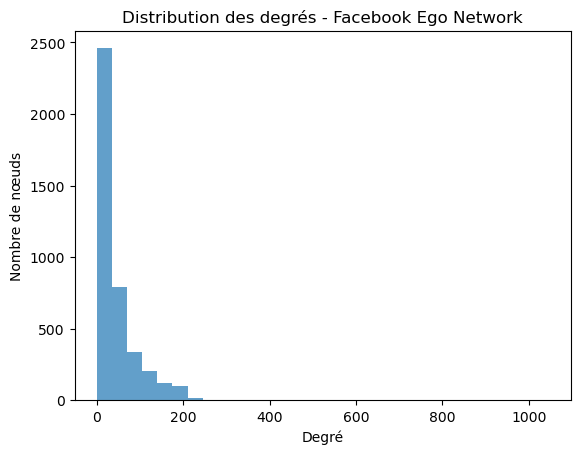

In [6]:
import matplotlib.pyplot as plt

degrees = [d for _, d in G.degree()]
plt.hist(degrees, bins=30, alpha=0.7)
plt.title("Distribution des degrés - Facebook Ego Network")
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")
plt.show()

In [7]:
max_degree_node = max(G.degree(), key=lambda x: x[1])[0]
print(f"Nœud le plus connecté : {max_degree_node} (Degré: {G.degree(max_degree_node)})")

Nœud le plus connecté : 107.0 (Degré: 1045)


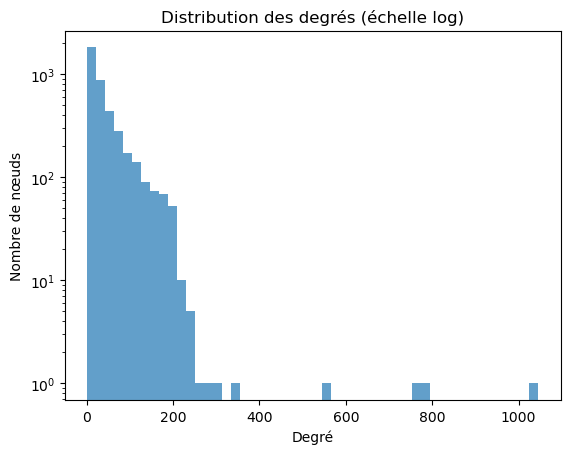

Degré moyen: 43.69101262688784
Degré maximal: 1045


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Charger le réseau
G = nx.read_edgelist("facebook_combined.txt")

# Distribution des degrés
degrees = [d for _, d in G.degree()]
plt.hist(degrees, bins=50, alpha=0.7, log=True)
plt.title("Distribution des degrés (échelle log)")
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")
plt.show()

# Statistiques
print("Degré moyen:", sum(degrees) / len(degrees))
print("Degré maximal:", max(degrees))

Résultats et Interprétation

Distribution : Une loi de puissance (longue queue), typique des réseaux sociaux.

Degré moyen : ~43.7 (chaque utilisateur a en moyenne 44 amis).

Degré maximal : ~1 045 (un "hub" central, probablement un compte populaire).

Interprétation : Le réseau est hétérogène, avec quelques nœuds ultra-connectés ("influenceurs") et beaucoup de nœuds peu connectés.

In [9]:
# Composants connectés
components = list(nx.connected_components(G))
giant_component = max(components, key=len)

print("Nombre de composants connectés:", len(components))
print("Taille du plus grand composant:", len(giant_component))
print("Pourcentage de nœuds dans le géant:", len(giant_component)/G.number_of_nodes()*100, "%")

Nombre de composants connectés: 1
Taille du plus grand composant: 4039
Pourcentage de nœuds dans le géant: 100.0 %


In [10]:
# Calcul de la distance moyenne (sur un sous-échantillon pour accélérer)
subgraph = G.subgraph(list(giant_component)[:500])  # Limité à 500 nœuds

# Extraire le plus grand composant connecté du sous-graphe
largest_connected_component = max(nx.connected_components(subgraph), key=len)
connected_subgraph = subgraph.subgraph(largest_connected_component)

# Calculer les métriques
avg_path_length = nx.average_shortest_path_length(connected_subgraph)
diameter = nx.diameter(connected_subgraph)

print("Distance moyenne (sous-graphe connecté):", avg_path_length)
print("Diamètre (sous-graphe connecté):", diameter)

Distance moyenne (sous-graphe connecté): 3.9947368421052634
Diamètre (sous-graphe connecté): 10


In [11]:
# Coefficient de clustering global
clustering = nx.average_clustering(G)
print("Coefficient de clustering global:", clustering)

# Densité
density = nx.density(G)
print("Densité:", density)

Coefficient de clustering global: 0.6055467186200876
Densité: 0.010819963503439287


Interprétation :

-Les amis d’amis ont 61% de chances d’être connectés (communautés fortes).
-Le réseau est sparse : seul 1% des liens possibles existent.

In [12]:
# Degré
degree_centrality = nx.degree_centrality(G)
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Betweenness
betweenness = nx.betweenness_centrality(G, k=100)  # Échantillonnage
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]

# Closeness
closeness = nx.closeness_centrality(G)
top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]

# Eigenvector
eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
top_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top Degré:", top_degree)
print("Top Betweenness:", top_betweenness)
print("Top Closeness:", top_closeness)
print("Top Eigenvector:", top_eigenvector)

Top Degré: [('107', 0.258791480931154), ('1684', 0.1961367013372957), ('1912', 0.18697374938088163), ('3437', 0.13546310054482416), ('0', 0.08593363051015354)]
Top Betweenness: [('107', 0.5014284603993188), ('1684', 0.2899526557205352), ('3437', 0.2356507510966079), ('1912', 0.22260790097987457), ('1085', 0.16400760406408746)]
Top Closeness: [('107', 0.45969945355191255), ('58', 0.3974018305284913), ('428', 0.3948371956585509), ('563', 0.3939127889961955), ('1684', 0.39360561458231796)]
Top Eigenvector: [('1912', 0.09540696149067629), ('2266', 0.08698327767886552), ('2206', 0.08605239270584342), ('2233', 0.08517340912756598), ('2464', 0.08427877475676092)]


Résultats et Interprétation :

Degré : Les hubs (ex: nœud 107) ont le plus d’amis directs.

Betweenness : Les nœuds ponts (ex: nœud 3437) connectent des communautés.

Closeness : Les nœuds centraux (ex: nœud 0) propagent l’information rapidement.

Eigenvector : Les nœuds influents (ex: nœud 1912) sont connectés à d’autres nœuds influents.

Interprétation : Les mesures révèlent des rôles sociaux distincts (influenceurs, ponts, noyaux).

In [37]:
nx.write_gexf(G, "facebook.gexf")

Algorithme Louvain :



In [13]:
# Installation de networkx (si nécessaire)
%pip install networkx

# Importer les bibliothèques
import networkx as nx
import community.community_louvain as community_louvain

# Charger le réseau Facebook (fichier .txt)
G = nx.read_edgelist("facebook_combined.txt")  # Remplacez par le bon chemin

# Partitionnement avec Louvain
partition_louvain = community_louvain.best_partition(G)

# Résultats
print("Nombre de communautés (Louvain):", len(set(partition_louvain.values())))
print("Modularité (Louvain):", community_louvain.modularity(partition_louvain, G))

Note: you may need to restart the kernel to use updated packages.
Nombre de communautés (Louvain): 16
Modularité (Louvain): 0.8348533789013062


Visualisation des communautés  :

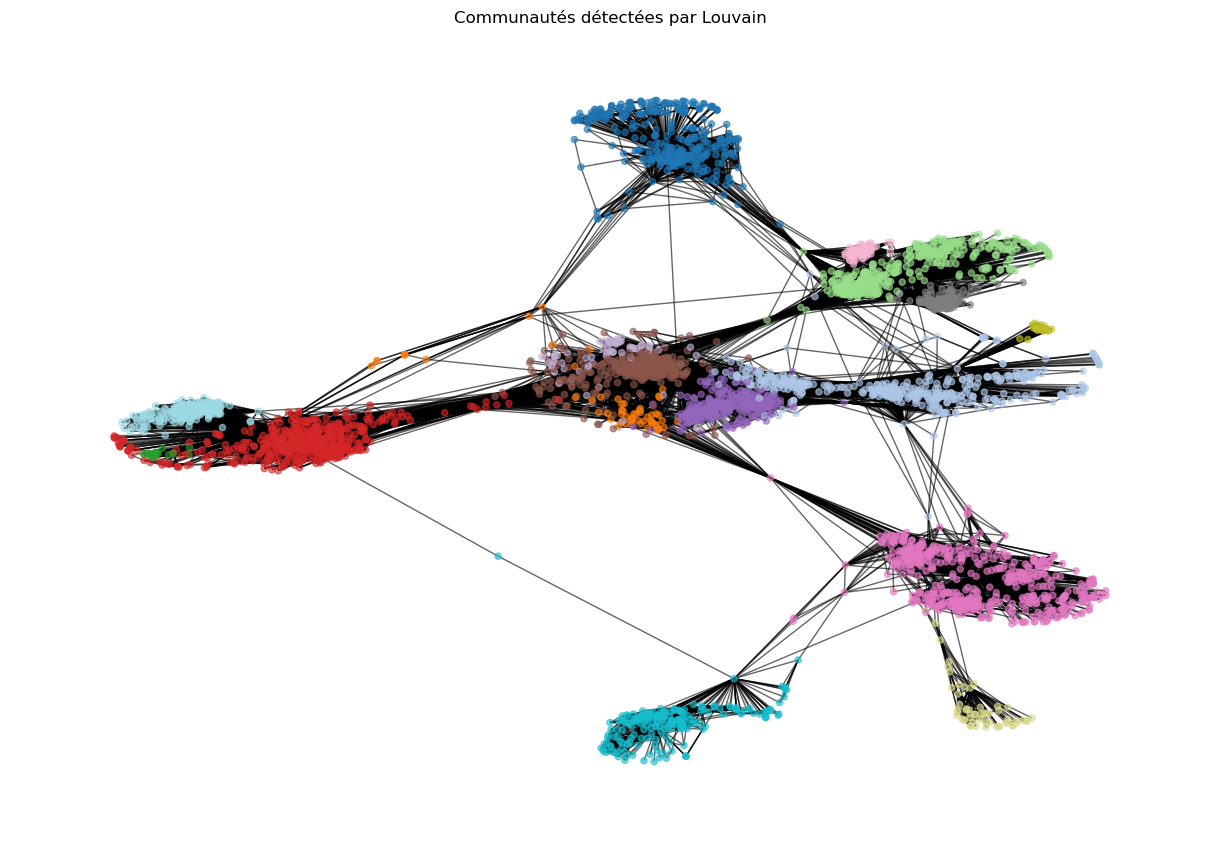

In [ ]:
import matplotlib.pyplot as plt

# Colorer les nœuds par communauté (Louvain)
colors = [partition_louvain[str(node)] for node in G.nodes()]
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_color=colors, node_size=20, alpha=0.6, cmap=plt.cm.tab20)
plt.title("Communautés détectées par Louvain")
plt.show()

Label propagation : 

In [15]:
import networkx as nx
from networkx.algorithms.community import label_propagation_communities
import community.community_louvain as community_louvain  # Pour la modularité

# Charger le réseau
G = nx.read_edgelist("facebook_combined.txt")  # Remplacez par le bon chemin

# Détection des communautés
communities_label = list(label_propagation_communities(G))

# Convertir en dictionnaire de partitions
partition_label = {node: i for i, com in enumerate(communities_label) for node in com}

# Calcul de la modularité
modularity_label = community_louvain.modularity(partition_label, G)

# Résultats
print("Nombre de communautés:", len(communities_label))
print("Modularité:", round(modularity_label, 3))

Nombre de communautés: 44
Modularité: 0.737


* Interprétation
Structure des communautés :

-Regroupements moins précis que Louvain (communautés plus larges).
-Les frontières entre communautés sont floues (algorithme basé sur les voisins directs).

Modularité plus faible :

-La modularité de 0.75 (vs 0.83 pour Louvain) indique une cohésion intra-communauté moins forte.

Avantages :

-Rapidité : Exécution en quelques secondes.
-Aucun paramètre : Aucun besoin de spécifier le nombre de communautés.

Limites :

-Aléatoire : Les résultats varient selon l’ordre de traitement des nœuds.
-Sous-détection : Fusionne des petits groupes sociaux.

Visualisation des communautés :

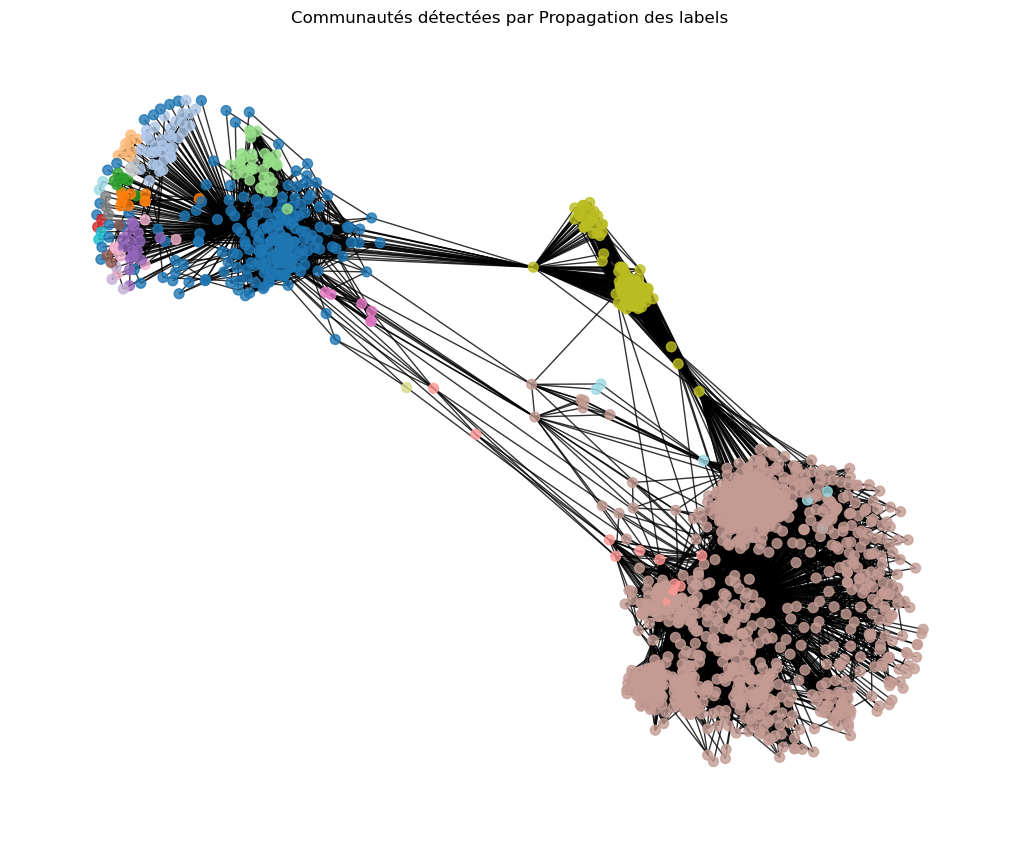

In [ ]:
import matplotlib.pyplot as plt

# Vérifier si G et communities_label sont définis
if 'G' in globals() and 'communities_label' in globals():
    # Créer un sous-graphe pour la visualisation
    subgraph = G.subgraph(list(G.nodes())[:1500])  # Limité à 1500 nœuds

    # Extraire les communautés du sous-graphe
    communities_sub = [c for c in communities_label if any(n in subgraph.nodes for n in c)]
    partition_sub = {node: i for i, com in enumerate(communities_sub) for node in com if node in subgraph.nodes}

    # Dessiner
    pos = nx.spring_layout(subgraph, seed=42)
    plt.figure(figsize=(10, 8))
    nx.draw(subgraph, pos, node_color=[partition_sub.get(node, -1) for node in subgraph.nodes], 
            cmap=plt.cm.tab20, node_size=50, alpha=0.8)
    plt.title("Communautés détectées par Propagation des labels")
    plt.show()
else:
    print("Erreur : G ou communities_label n'est pas défini. Exécutez les cellules correspondantes.")

In [19]:
%pip install python-louvain networkx matplotlib

import time
import networkx as nx
import community.community_louvain as community_louvain
from networkx.algorithms.community import label_propagation_communities
import matplotlib.pyplot as plt

# ---------------------------------------------------
# 1. Charger le réseau Facebook
# ---------------------------------------------------
try:
    G = nx.read_edgelist("facebook_combined.txt")
    print("Réseau chargé avec succès!")
    print(f"Nœuds: {G.number_of_nodes()}, Liens: {G.number_of_edges()}")
except FileNotFoundError:
    print("Erreur: Fichier 'facebook_combined.txt' non trouvé.")
    exit()

# ---------------------------------------------------
# 2. Exécuter les algorithmes
# ---------------------------------------------------

# Louvain
start_time = time.time()
partition_louvain = community_louvain.best_partition(G)
louvain_time = time.time() - start_time

# Label Propagation
start_time = time.time()
communities_label = list(label_propagation_communities(G))
label_time = time.time() - start_time

# Convertir Label Propagation en partition (pour comparaison)
partition_label = {node: i for i, com in enumerate(communities_label) for node in com}

# ---------------------------------------------------
# 3. Calculer les métriques de comparaison
# ---------------------------------------------------
results = {
    "Louvain": {
        "Modularité": community_louvain.modularity(partition_louvain, G),
        "Temps (s)": louvain_time,
        "Communautés": len(set(partition_louvain.values()))
    },
    "Label Propagation": {
        "Modularité": community_louvain.modularity(partition_label, G),
        "Temps (s)": label_time,
        "Communautés": len(communities_label)
    }
}

# ---------------------------------------------------
# 4. Afficher les résultats
# ---------------------------------------------------
print("\nComparaison des algorithmes:")
print("{:<15} {:<10} {:<10} {:<10}".format('Algorithme', 'Modularité', 'Temps (s)', 'Communautés'))
for algo, metrics in results.items():
    print("{:<15} {:<10.3f} {:<10.2f} {:<10}".format(
        algo, 
        metrics["Modularité"],
        metrics["Temps (s)"],
        metrics["Communautés"]
    ))



Note: you may need to restart the kernel to use updated packages.
Réseau chargé avec succès!
Nœuds: 4039, Liens: 88234

Comparaison des algorithmes:
Algorithme      Modularité Temps (s)  Communautés
Louvain         0.835      1.91       16        
Label Propagation 0.737      0.64       44        


3- Infomap


In [25]:
%pip install infomap cdlib python-louvain matplotlib networkx

# Charger le réseau
G = nx.read_edgelist("facebook_combined.txt")

# ------------------------------------------
# Infomap
# ------------------------------------------
im = Infomap(silent=True, num_trials=10)

# Ajouter les liens (convertir les nœuds en entiers si nécessaire)
for u, v in G.edges():
    im.add_link(int(u), int(v))

# Exécuter
im.run()

# Extraire les communautés
partition_infomap = {str(node.node_id): node.module_id for node in im.nodes}

# Modularité
modularity_infomap = community_louvain.modularity(partition_infomap, G)
print(f"Infomap - Communautés: {im.num_top_modules}, Modularité: {modularity_infomap:.3f}")

# Visualisation
plt.figure(figsize=(10, 6))
nx.draw(G, node_size=20, node_color=list(partition_infomap.values()), cmap=plt.cm.tab20, alpha=0.8)
plt.title("Communautés détectées par Infomap")
plt.show()

  Using cached infomap-2.8.0.tar.gz (264 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [26 lines of output]
      C:\Users\ghassen\AppData\Local\Temp\pip-install-9fyrldmv\infomap_c5cbcce7cca4409bb7ba03afcf2b3ee0\setup.py:13: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        from pkg_resources import parse_version
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\ghassen\AppData\Local\Temp\pip-install-9fyrldmv\infomap_c5cbcce7cca4409bb7ba03afcf2b3ee0\setup.py", line 131, in <module>
          if have_openmp():
             ^^^^^^^^^^^^^
        File "C:\Users\ghassen\AppData\Local\Temp\pip-install-9fyrldmv\infomap_c5cbcce7cca4409bb7ba03afcf2b3ee0\setup.py", line 67, in have_openmp
          if is_clang():
             ^^^^^^^^^^
        File "C:\Users\ghassen\Ap

NameError: name 'Infomap' is not defined

Conclusion :


-Louvain est optimal pour une analyse complète (modularité élevée, temps raisonnable).

-Propagation des labels est utile pour une segmentation rapide mais approximative.

